In [58]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import importlib
import lib.ting_utils
importlib.reload(lib.ting_utils)
from lib.ting_utils import getSampledSignal
from lib.ting_utils import getVariation

In [2]:
datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  # printed in default format

<class 'datetime.datetime'>
2018-09-19 13:55:26


In [3]:
df = pd.read_csv('csvs/1hour_filtered_3DCA95.csv')

In [4]:
x = df['time']
y = df['data']

In [5]:
x = range(150)

In [6]:
y

0      57.746656
1      55.006280
2      54.922222
3      57.168713
4      58.302514
         ...    
145    65.892476
146    72.014070
147    71.777084
148    66.139733
149    58.006331
Name: data, Length: 150, dtype: float64

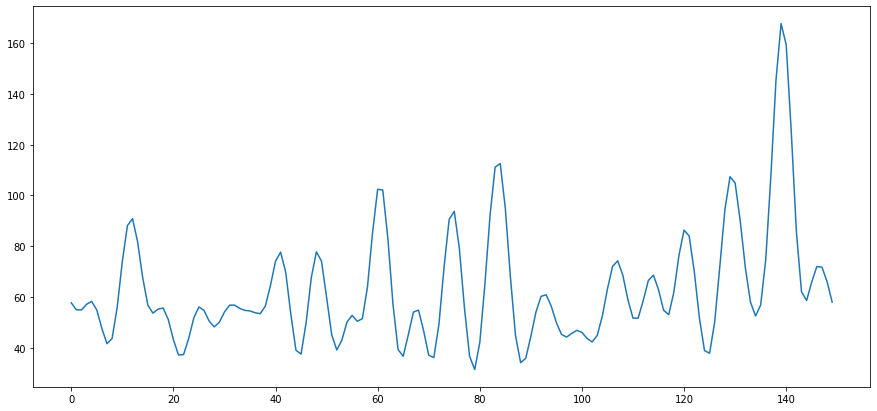

In [7]:
plt.figure(figsize=(15,7))
plt.plot(x, y)

## Get sampled signal

In [8]:
sampled_y = getSampledSignal(y, x, 15, sampling_offset=0)

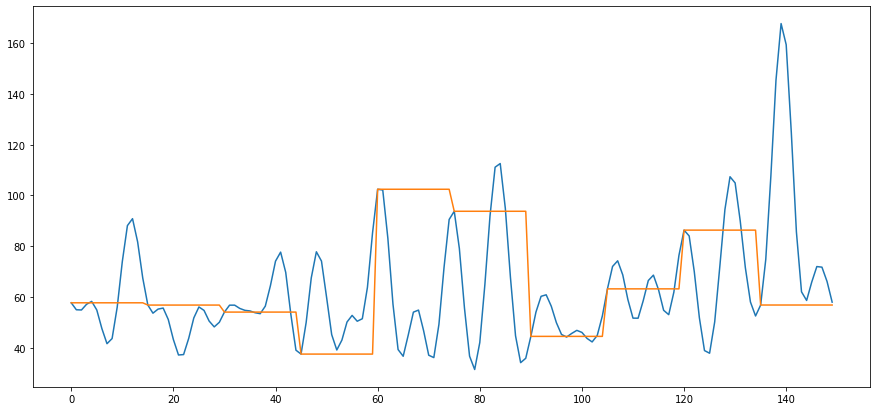

In [9]:
plt.figure(figsize=(15,7))
plt.plot(x, y)
plt.plot(x, sampled_y)

## Get total variation

In [21]:
y[1]

55.00628047570492

In [55]:
sample_interval = 15
sampled_ys = []
for i in range(sample_interval):
    sampled_y_offset = getSampledSignal(y, x, sample_interval, sampling_offset=i)
    sampled_ys.append(sampled_y_offset)
    var = getVariation(y, sampled_y_offset, offset=i)
    print('Offset:',i,'Variation:',var)

Offset: 0 Variation: 2795.292571476686
Offset: 1 Variation: 2637.8052221494763
Offset: 2 Variation: 2471.784480280493
Offset: 3 Variation: 2656.033838771412
Offset: 4 Variation: 3158.606787407708
Offset: 5 Variation: 3170.9107458249237
Offset: 6 Variation: 2850.2562818055894
Offset: 7 Variation: 2704.3048970581062
Offset: 8 Variation: 2693.1005844627944
Offset: 9 Variation: 2738.39306844338
Offset: 10 Variation: 2899.524338450959
Offset: 11 Variation: 2928.946878024652
Offset: 12 Variation: 2733.9270966675717
Offset: 13 Variation: 2603.205880465514
Offset: 14 Variation: 2628.1758899281244


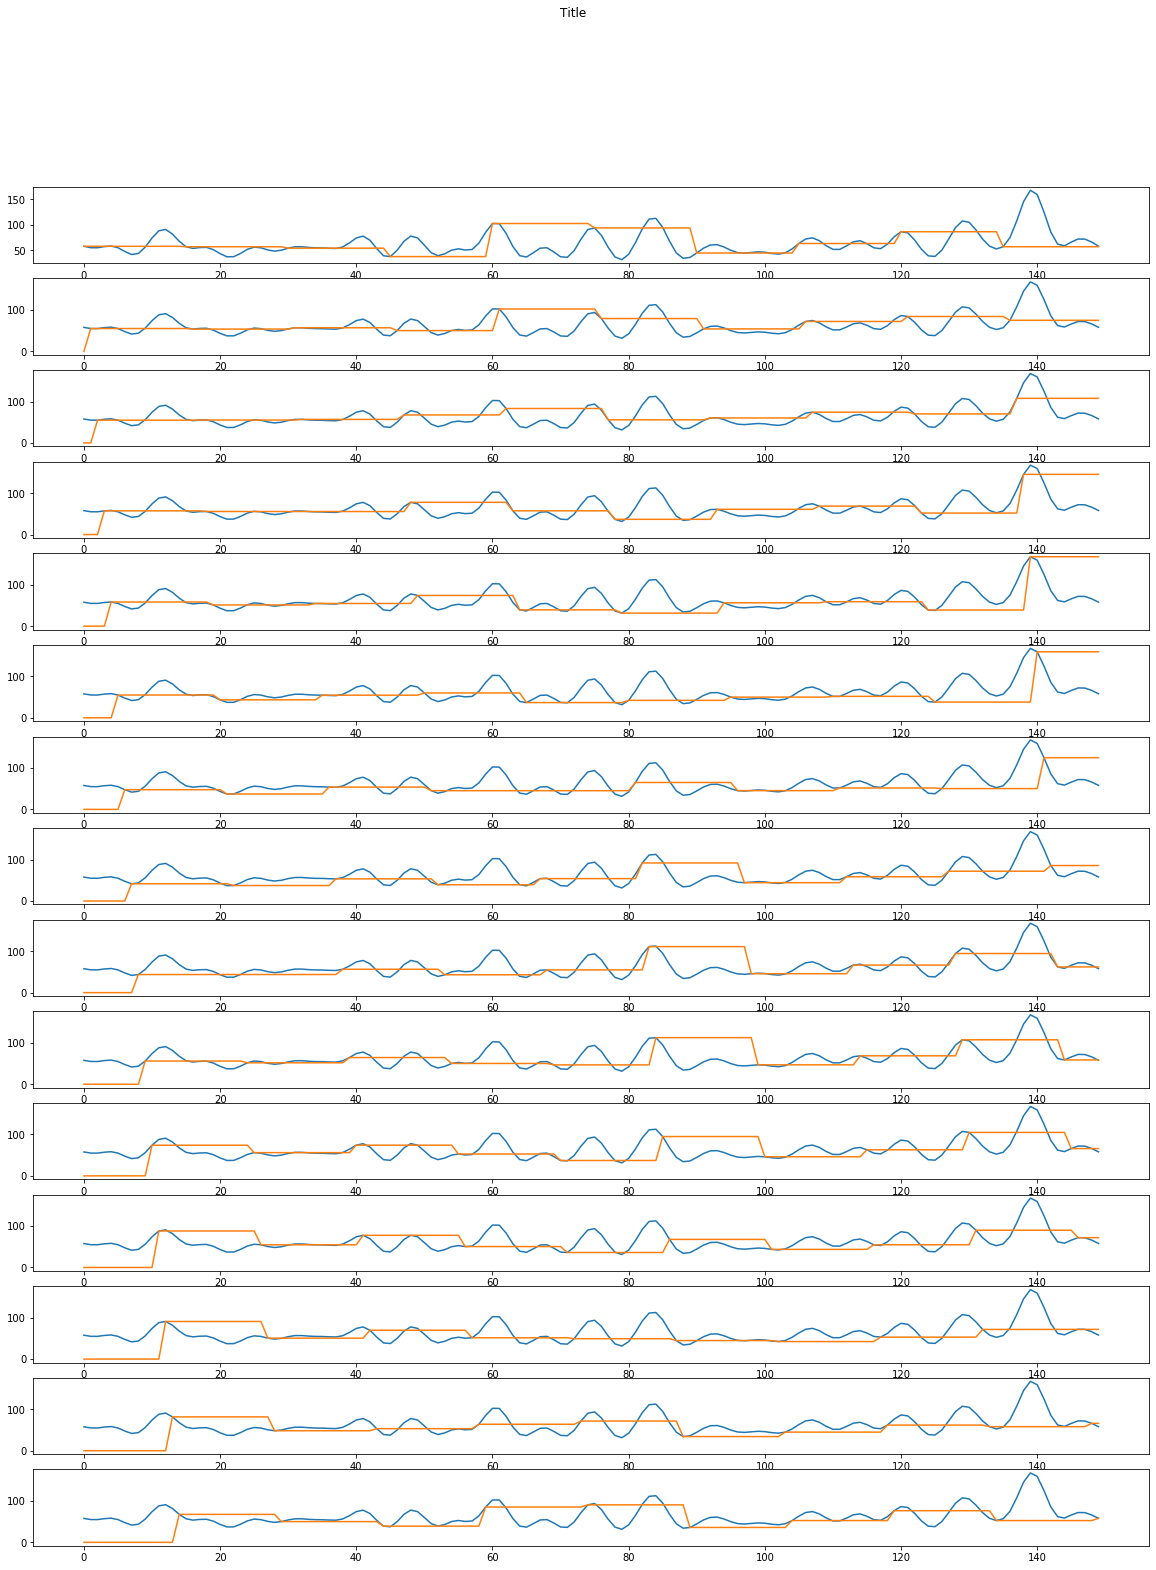

In [56]:
## VISUALISATION

# Plot
fig, axs = plt.subplots(sample_interval, figsize=(20,25))
fig.suptitle('Title')

for i in range(sample_interval):
    axs[i].plot(x, y)
    axs[i].plot(x, sampled_ys[i])

#axs[2].set_xticks(np.arange(min(x), max(x), 10))

In [61]:
sample_interval = 30
sampled_ys = []
for i in range(sample_interval):
    sampled_y_offset = getSampledSignal(y, x, sample_interval, sampling_offset=i)
    sampled_ys.append(sampled_y_offset)
    var = getVariation(y, sampled_y_offset, offset=i)

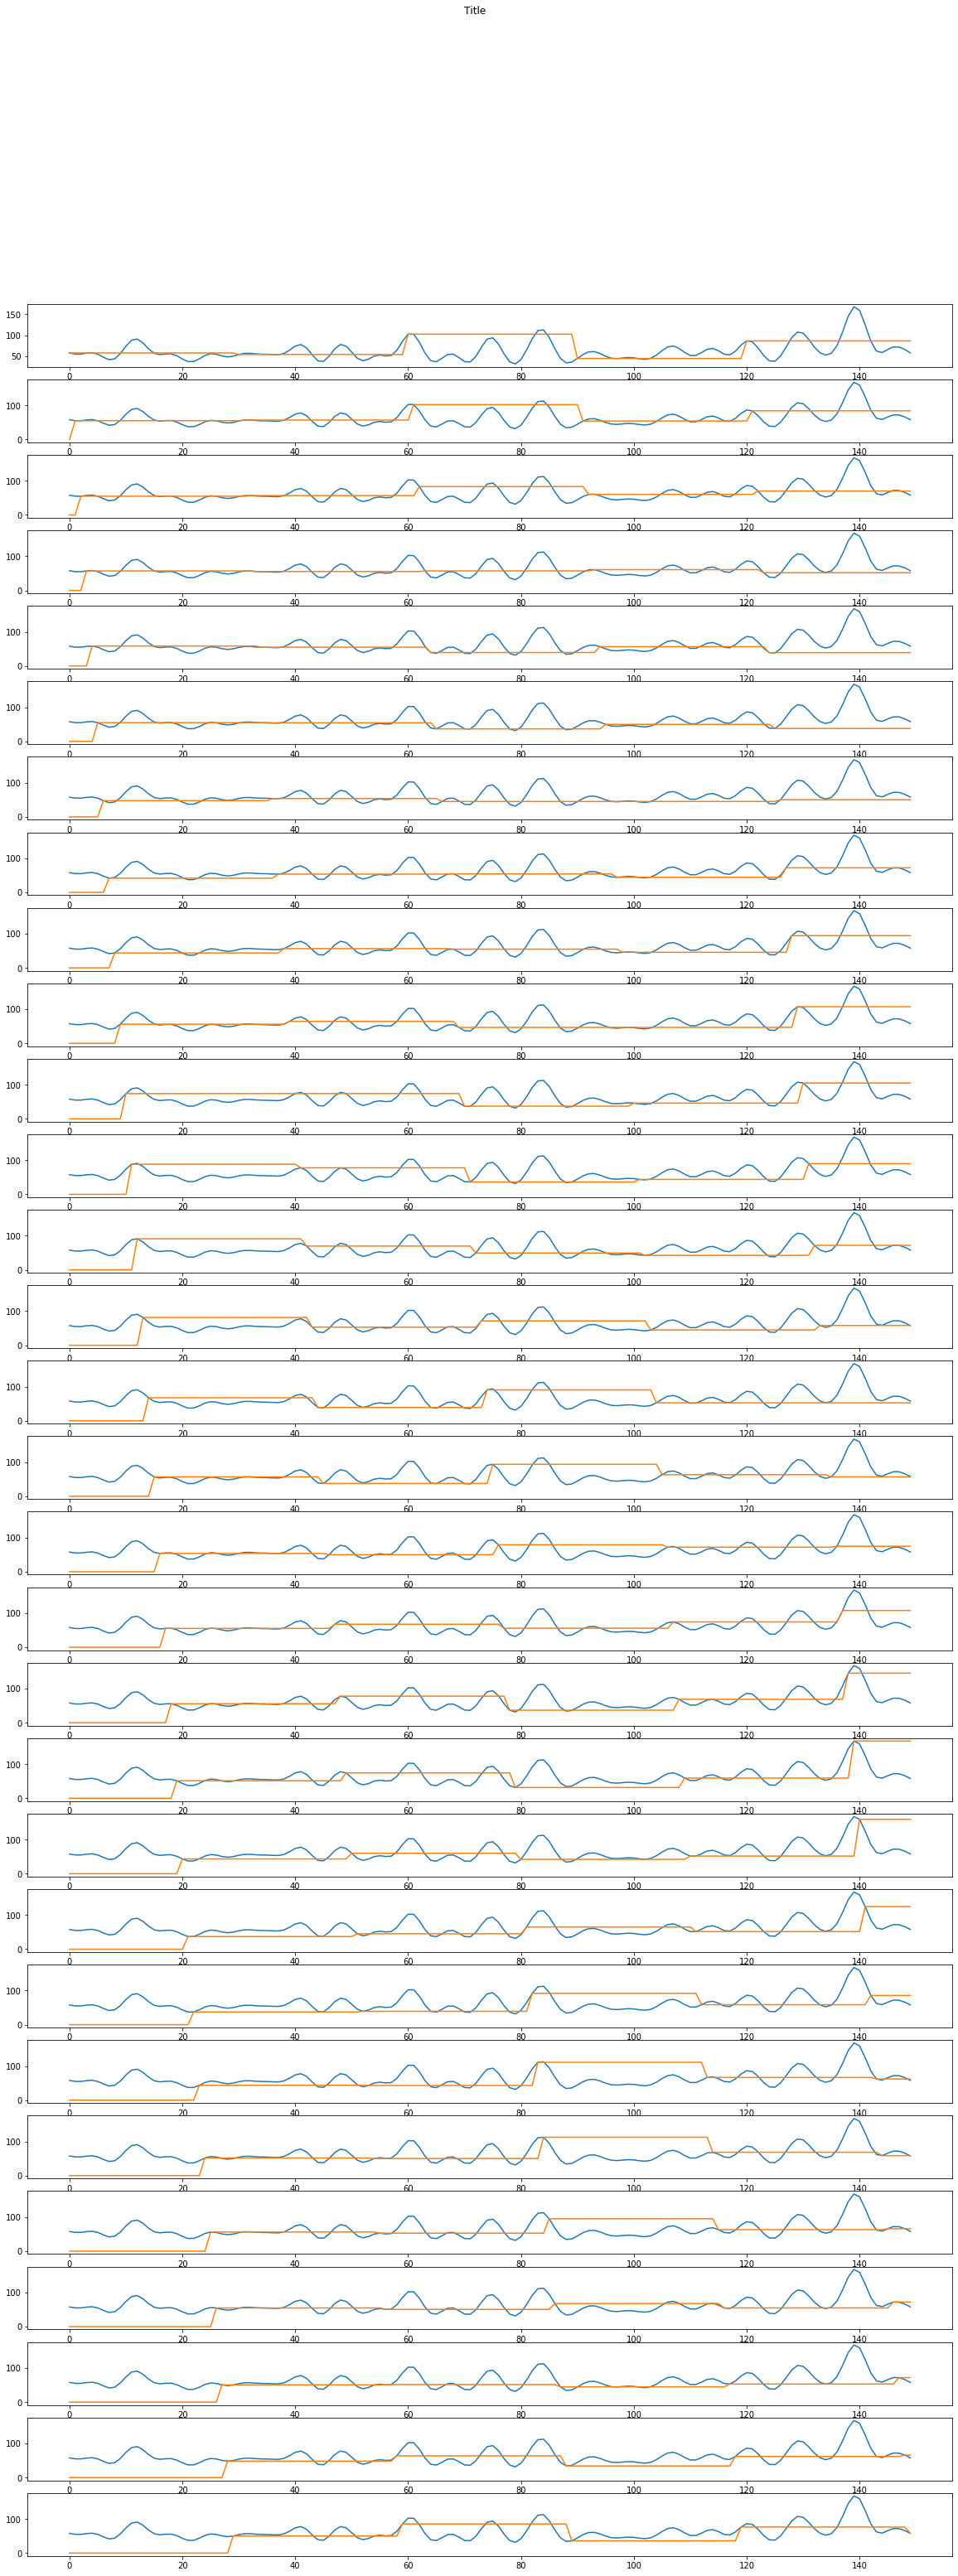

In [64]:
## VISUALISATION

# Plot
fig, axs = plt.subplots(sample_interval, figsize=(20,50))
fig.suptitle('Title')

for i in range(sample_interval):
    axs[i].plot(x, y)
    axs[i].plot(x, sampled_ys[i])

#axs[2].set_xticks(np.arange(min(x), max(x), 10))